In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/height_weight.csv')
df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [3]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [4]:
df.tail()

,Height,Weight
10,1.73,66.28
11,1.75,68.10
12,1.78,69.92
13,1.80,72.19
14,1.83,74.46


In [5]:
df.columns

Index(['Height', 'Weight'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [7]:
df.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [8]:
df.isna().sum()

Height    0
Weight    0
dtype: int64

In [21]:
df.dtypes

Height    float64
Weight    float64
dtype: object

In [9]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [12]:
y_test

9     64.47
11    68.10
0     52.21
13    72.19
5     58.57
Name: Weight, dtype: float64

In [13]:
print(model.predict([[1.7]]))

[65.03579687]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


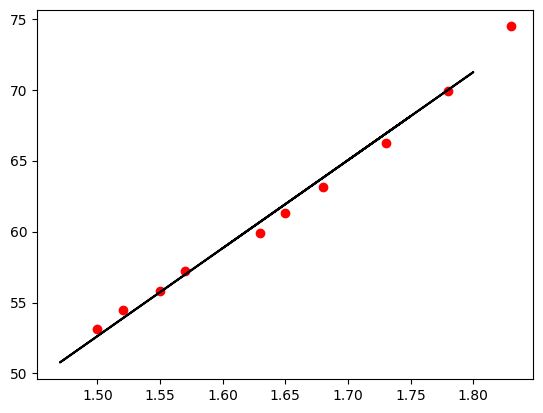

In [14]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_pred,color='k')

In [15]:
print("slope is",model.coef_)
print("constant is",model.intercept_)

slope is [62.01422981]
constant is -40.388393810032014


In [16]:
data={'actual_value':y_test,'predicted_value':y_pred,'difference':y_test-y_pred}
df1=pd.DataFrame(data)
df1

,actual_value,predicted_value,difference
9,64.47,65.035797,-0.565797
11,68.10,68.136508,-0.036508
0,52.21,50.772524,1.437476
13,72.19,71.237220,0.952780
5,58.57,58.834374,-0.264374


In [17]:
from sklearn.metrics import mean_absolute_error
print("MAE is",mean_absolute_error(y_pred,y_test))

MAE is 0.6513870508715769


In [18]:
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is",mean_absolute_percentage_error(y_pred,y_test))

MAPE is 0.011083190446830066


In [19]:
from sklearn.metrics import mean_squared_error
print("MSE is",mean_squared_error(y_pred,y_test))

MSE is 0.6730959475011951


In [20]:
value=mean_squared_error(y_pred,y_test)
print(np.sqrt(value))

0.8204242484844015
